<a href="https://colab.research.google.com/github/muhammadhafiz27/VisualisasiData_Kuantitatif_2311532007/blob/main/Collab/TugasVisDat_Kuantitatif_2311532007.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv('https://raw.githubusercontent.com/muhammadhafiz27/VisualisasiData_Kuantitatif_2311532007/refs/heads/main/Dataset/unemployment%20analysis.csv')

# Menampilkan beberapa baris pertama dari dataset
print(df.head())

# Menampilkan informasi tentang dataset
print(df.info())

# Menampilkan statistik deskriptif dari dataset
print(df.describe())


                  Country Name Country Code   1991   1992   1993   1994  \
0  Africa Eastern and Southern          AFE   7.80   7.84   7.85   7.84   
1                  Afghanistan          AFG  10.65  10.82  10.72  10.73   
2   Africa Western and Central          AFW   4.42   4.53   4.55   4.54   
3                       Angola          AGO   4.21   4.21   4.23   4.16   
4                      Albania          ALB  10.31  30.01  25.26  20.84   

    1995   1996   1997   1998  ...   2012   2013   2014   2015   2016   2017  \
0   7.83   7.84   7.86   7.81  ...   6.56   6.45   6.41   6.49   6.61   6.71   
1  11.18  10.96  10.78  10.80  ...  11.34  11.19  11.14  11.13  11.16  11.18   
2   4.53   4.57   4.60   4.66  ...   4.64   4.41   4.69   4.63   5.57   6.02   
3   4.11   4.10   4.09   4.07  ...   7.35   7.37   7.37   7.39   7.41   7.41   
4  14.61  13.93  16.88  20.05  ...  13.38  15.87  18.05  17.19  15.42  13.62   

    2018   2019   2020   2021  
0   6.73   6.91   7.56   8.11  
1  1

In [2]:
country_name = []
country_code = []
year = []
unemployment_rate = []
column_names = df.columns[2:]

for index, row in df.iterrows():
    for temp_year in column_names:
        country_name.append(row['Country Name'])
        country_code.append(row['Country Code'])
        year.append(temp_year)
        unemployment_rate.append(row[temp_year])

df2 = pd.DataFrame(data={'Year': year,'Country Name': country_name,'Country Code': country_code,'Unemployement Rate': unemployment_rate})
df2.head()

,Year,Country Name,Country Code,Unemployement Rate
0,1991,Africa Eastern and Southern,AFE,7.80
1,1992,Africa Eastern and Southern,AFE,7.84
2,1993,Africa Eastern and Southern,AFE,7.85
3,1994,Africa Eastern and Southern,AFE,7.84
4,1995,Africa Eastern and Southern,AFE,7.83


In [3]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7285 entries, 0 to 7284
Data columns (total 4 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Year                7285 non-null   object 
 1   Country Name        7285 non-null   object 
 2   Country Code        7285 non-null   object 
 3   Unemployement Rate  7285 non-null   float64
dtypes: float64(1), object(3)
memory usage: 227.8+ KB


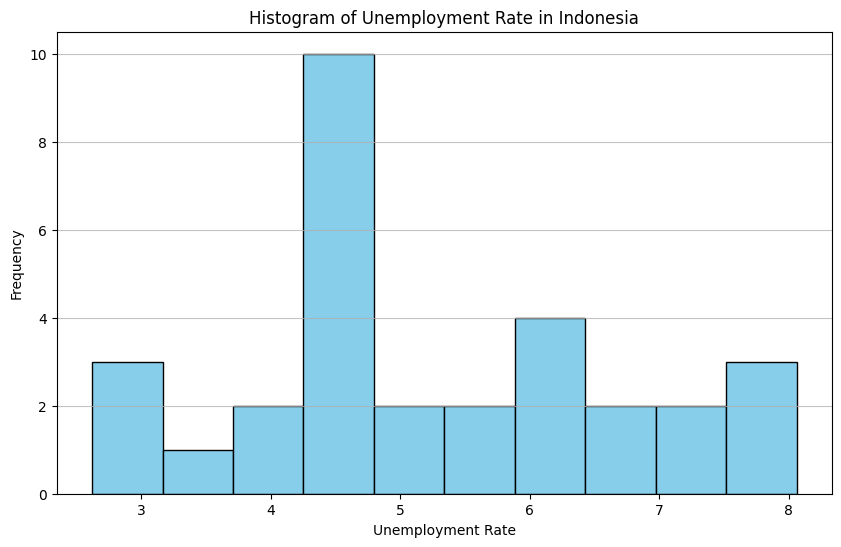

In [4]:
# Filter data for Indonesia
indonesia_data = df2[df2['Country Name'] == 'Indonesia']

# Create the histogram
plt.figure(figsize=(10, 6))
plt.hist(indonesia_data['Unemployement Rate'], bins=10, color='skyblue', edgecolor='black')
plt.title('Histogram of Unemployment Rate in Indonesia')
plt.xlabel('Unemployment Rate')
plt.ylabel('Frequency')
plt.grid(axis='y', alpha=0.75)
plt.show()


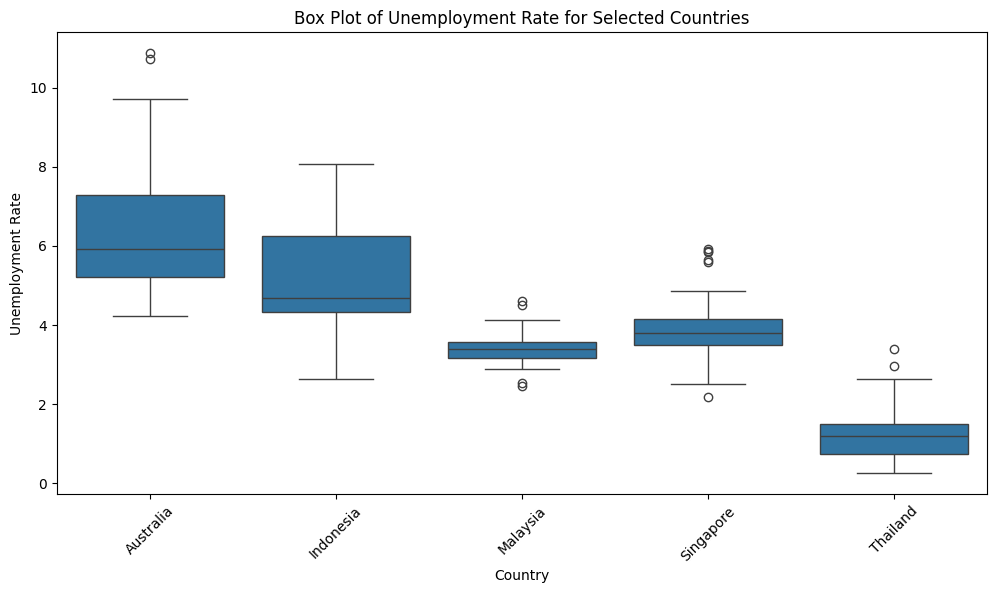

In [7]:
import seaborn as sns

# Select countries
countries = ['Indonesia', 'Malaysia', 'Australia', 'Thailand', 'Singapore']
selected_data = df2[df2['Country Name'].isin(countries)]

# Create the box plot
plt.figure(figsize=(12, 6))
sns.boxplot(x='Country Name', y='Unemployement Rate', data=selected_data)
plt.title('Box Plot of Unemployment Rate for Selected Countries')
plt.xlabel('Country')
plt.ylabel('Unemployment Rate')
plt.xticks(rotation=45)
plt.show()


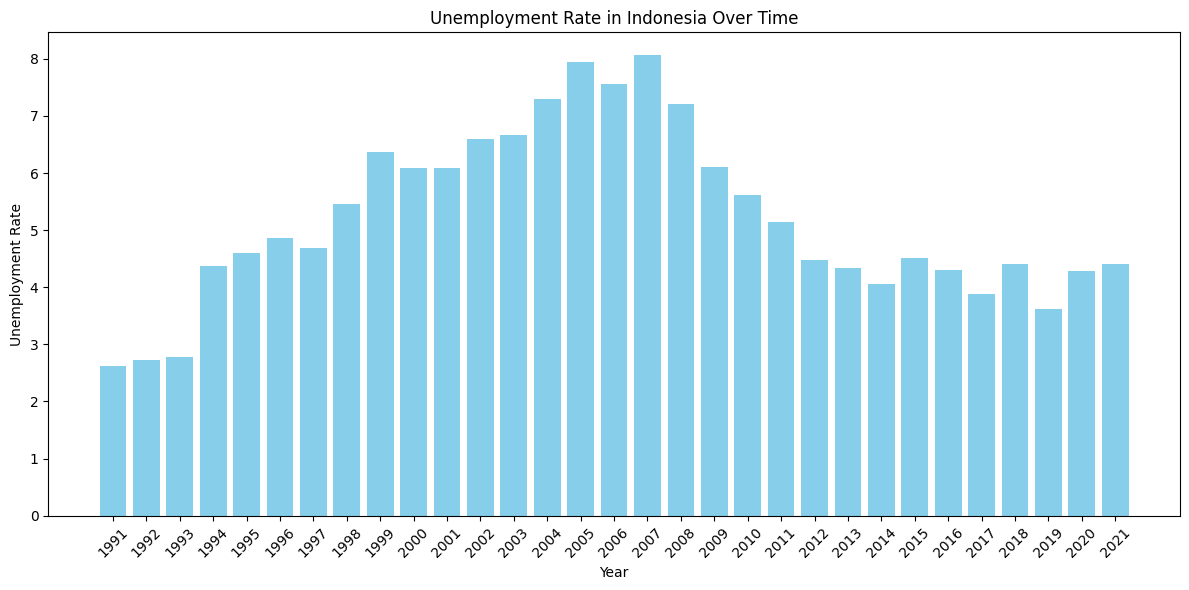

In [12]:
# Filter data for Indonesia
indonesia_data = df2[df2['Country Name'] == 'Indonesia']

# Create the bar chart
plt.figure(figsize=(12, 6))
plt.bar(indonesia_data['Year'], indonesia_data['Unemployement Rate'], color='skyblue')
plt.title('Unemployment Rate in Indonesia Over Time')
plt.xlabel('Year')
plt.ylabel('Unemployment Rate')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.tight_layout() # Adjust layout to prevent labels from overlapping
plt.show()


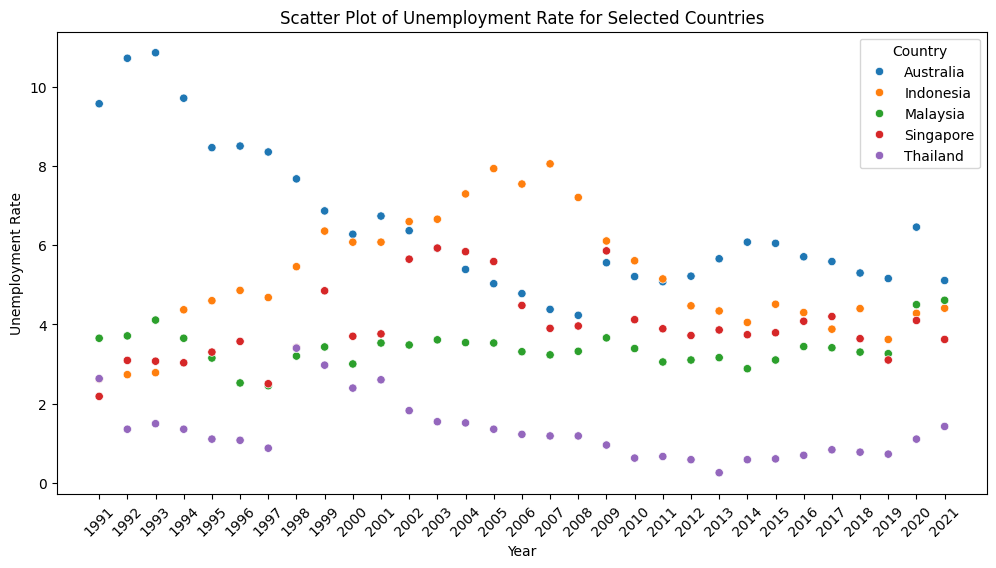

In [13]:
# Select countries for the scatter plot
countries = ['Indonesia', 'Malaysia', 'Australia', 'Thailand', 'Singapore']
selected_data = df2[df2['Country Name'].isin(countries)]

# Create the scatter plot
plt.figure(figsize=(12, 6))
sns.scatterplot(x='Year', y='Unemployement Rate', hue='Country Name', data=selected_data)
plt.title('Scatter Plot of Unemployment Rate for Selected Countries')
plt.xlabel('Year')
plt.ylabel('Unemployment Rate')
plt.xticks(rotation=45)
plt.legend(title='Country') # Add a legend to identify countries
plt.show()


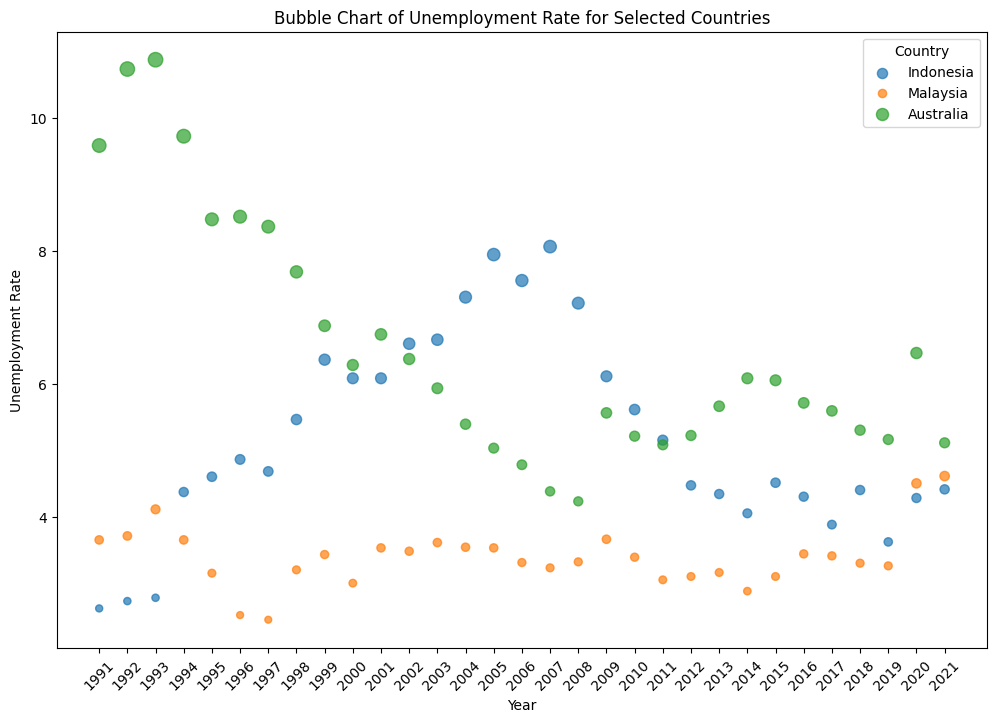

In [14]:
# Select countries for the bubble chart
countries = ['Indonesia', 'Malaysia', 'Australia']
selected_data = df2[df2['Country Name'].isin(countries)]

# Create the bubble chart
plt.figure(figsize=(12, 8))
for country in countries:
    country_data = selected_data[selected_data['Country Name'] == country]
    plt.scatter(country_data['Year'], country_data['Unemployement Rate'],
                s=country_data['Unemployement Rate'] * 10, # Adjust bubble size
                alpha=0.7, label=country)

plt.title('Bubble Chart of Unemployment Rate for Selected Countries')
plt.xlabel('Year')
plt.ylabel('Unemployment Rate')
plt.xticks(rotation=45)
plt.legend(title='Country')
plt.show()


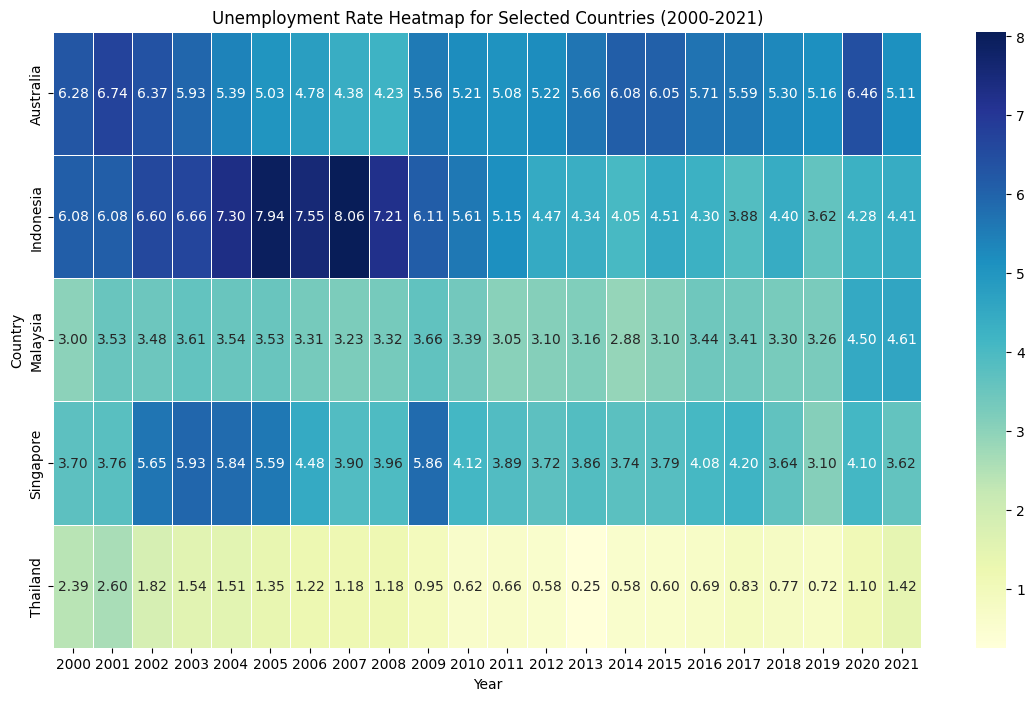

In [21]:
# Select countries and years for the heatmap
countries = ['Indonesia', 'Malaysia', 'Australia', 'Thailand', 'Singapore']
years = list(range(2000, 2022))  # Years from 2000 to 2021
selected_data = df2[df2['Country Name'].isin(countries) & df2['Year'].isin(map(str, years))]


# Pivot the data for the heatmap
heatmap_data = selected_data.pivot(index='Country Name', columns='Year', values='Unemployement Rate')

# Create the heatmap
plt.figure(figsize=(14, 8))
sns.heatmap(heatmap_data, annot=True, cmap='YlGnBu', fmt=".2f", linewidths=.5)
plt.title('Unemployment Rate Heatmap for Selected Countries (2000-2021)')
plt.xlabel('Year')
plt.ylabel('Country')
plt.show()


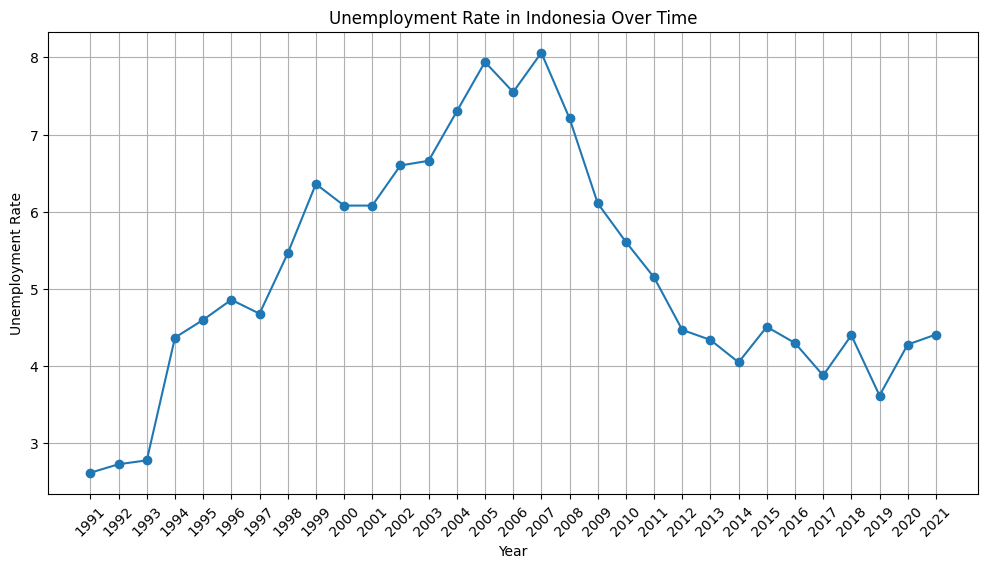

In [22]:
# Select a country for the line chart
country = 'Indonesia'  # Change this to visualize data for other countries
country_data = df2[df2['Country Name'] == country]

# Create the line chart
plt.figure(figsize=(12, 6))
plt.plot(country_data['Year'], country_data['Unemployement Rate'], marker='o', linestyle='-')
plt.title(f'Unemployment Rate in {country} Over Time')
plt.xlabel('Year')
plt.ylabel('Unemployment Rate')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()


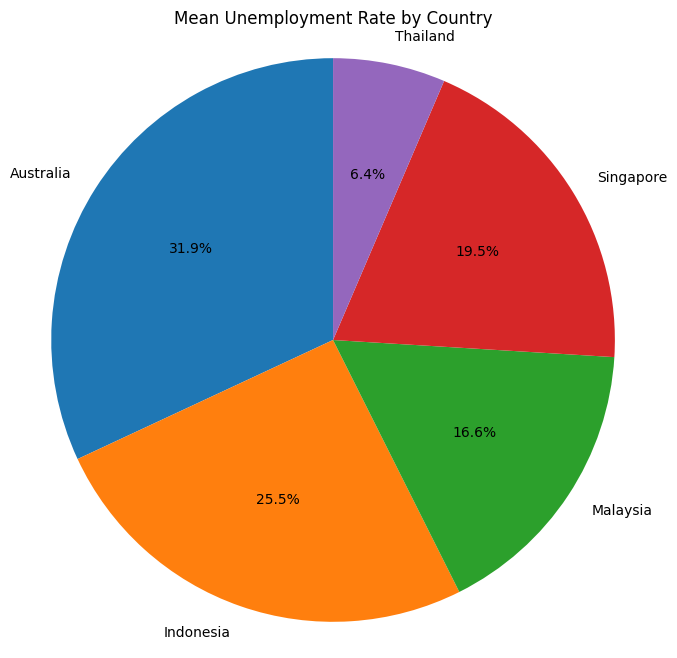

In [23]:
# Select countries for the pie chart
countries = ['Indonesia', 'Malaysia', 'Australia', 'Thailand', 'Singapore']
selected_data = df2[df2['Country Name'].isin(countries)]

# Group data by country and calculate the mean unemployment rate
country_means = selected_data.groupby('Country Name')['Unemployement Rate'].mean()

# Create the pie chart
plt.figure(figsize=(8, 8))
plt.pie(country_means, labels=country_means.index, autopct='%1.1f%%', startangle=90)
plt.title('Mean Unemployment Rate by Country')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()


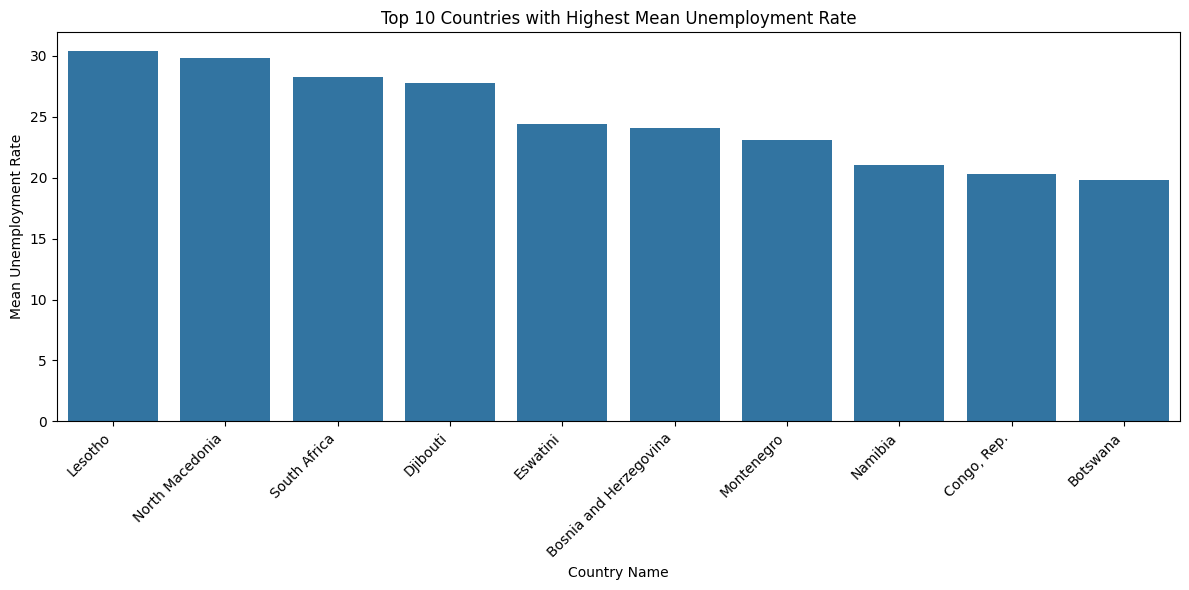

In [28]:
# Calculate the mean unemployment rate for each country
mean_unemployment = df2.groupby('Country Name')['Unemployement Rate'].mean()

# Sort the countries by mean unemployment rate in descending order and get the top 10
top_10_countries = mean_unemployment.sort_values(ascending=False).head(10)

# Create the bar plot
plt.figure(figsize=(12, 6))
sns.barplot(x=top_10_countries.index, y=top_10_countries.values)
plt.title('Top 10 Countries with Highest Mean Unemployment Rate')
plt.xlabel('Country Name')
plt.ylabel('Mean Unemployment Rate')
plt.xticks(rotation=45, ha='right') # Rotate x-axis labels for better readability
plt.tight_layout()
plt.show()


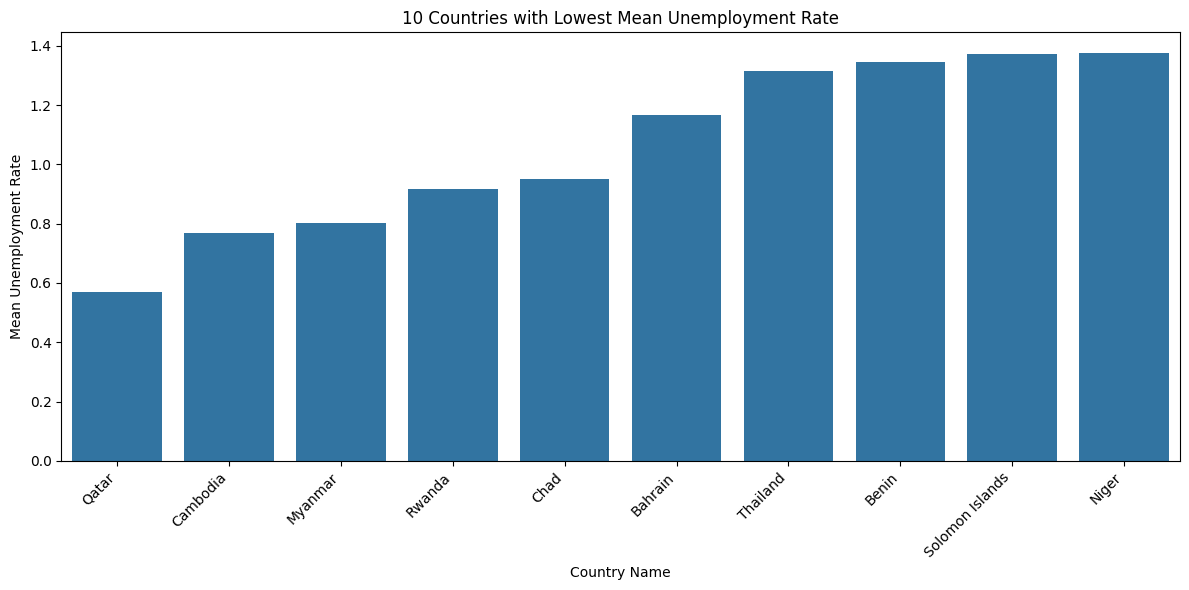

In [29]:
# Calculate the mean unemployment rate for each country
mean_unemployment = df2.groupby('Country Name')['Unemployement Rate'].mean()

# Sort the countries by mean unemployment rate in ascending order and get the top 10
bottom_10_countries = mean_unemployment.sort_values(ascending=True).head(10)

# Create the bar plot
plt.figure(figsize=(12, 6))
sns.barplot(x=bottom_10_countries.index, y=bottom_10_countries.values)
plt.title('10 Countries with Lowest Mean Unemployment Rate')
plt.xlabel('Country Name')
plt.ylabel('Mean Unemployment Rate')
plt.xticks(rotation=45, ha='right') # Rotate x-axis labels for better readability
plt.tight_layout()
plt.show()
